# **5 - Modeling**

## Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import log_loss
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Importing Pickle

In [2]:
with open('df.pkl', 'rb') as f:
    df = pickle.load(f)

## Selecting Features and Outcome

In [3]:
X = df[['Event', 'Fight', 'A', 'B', 'Date', 'Location', 'Division', 'Format', 'Referee', 
         'A_Record', 'A_Height', 'A_Weight', 'A_Reach', 'A_Stance', 'A_Birthday', 'A_Age', 'A_SLPM', 'A_SACC', 'A_SAPM', 'A_SD', 'A_TDAVG', 'A_TDACC', 'A_TDD', 'A_SAVG',
         'B_Record', 'B_Height', 'B_Weight', 'B_Reach', 'B_Stance', 'B_Birthday', 'B_Age', 'B_SLPM', 'B_SACC', 'B_SAPM', 'B_SD', 'B_TDAVG', 'B_TDACC', 'B_TDD', 'B_SAVG']]
Y = df['Winner']

display(X.head())
display(Y.to_frame().head())

,Event,Fight,A,B,Date,Location,Division,Format,Referee,A_Record,A_Height,A_Weight,A_Reach,A_Stance,A_Birthday,A_Age,A_SLPM,A_SACC,A_SAPM,A_SD,A_TDAVG,A_TDACC,A_TDD,A_SAVG,B_Record,B_Height,B_Weight,B_Reach,B_Stance,B_Birthday,B_Age,B_SLPM,B_SACC,B_SAPM,B_SD,B_TDAVG,B_TDACC,B_TDD,B_SAVG
0,UFC 306: Riyadh Season Noche UFC,Sean O'Malley vs. Merab Dvalishvili,Sean O'Malley,Merab Dvalishvili,2024-09-14,"Las Vegas, Nevada, USA",UFC Bantamweight Title Bout,5 Rnd (5-5-5-5-5),Herb Dean,18-2-0 (1 NC),154.94,61.236,182.88,Switch,1994-10-24,10918.0,6.70,0.61,3.48,0.60,0.29,0.42,0.61,0.3,18-4-0,167.64,61.236,172.72,Orthodox,1991-01-10,12301.0,4.35,0.42,2.31,0.56,6.09,0.36,0.80,0.3
1,UFC 306: Riyadh Season Noche UFC,Valentina Shevchenko vs. Alexa Grasso,Valentina Shevchenko,Alexa Grasso,2024-09-14,"Las Vegas, Nevada, USA",UFC Women's Flyweight Title Bout,5 Rnd (5-5-5-5-5),Mark Smith,24-4-1,165.10,56.700,167.64,Southpaw,1988-03-07,13340.0,3.16,0.52,2.00,0.64,2.74,0.64,0.71,0.3,16-4-1,165.10,56.700,167.64,Orthodox,1993-08-09,11359.0,4.19,0.41,3.69,0.58,0.44,0.40,0.54,0.7
2,UFC 306: Riyadh Season Noche UFC,Diego Lopes vs. Brian Ortega,Diego Lopes,Brian Ortega,2024-09-14,"Las Vegas, Nevada, USA",Featherweight Bout,3 Rnd (5-5-5),Marc Goddard,26-6-0,154.94,65.772,182.88,Orthodox,1994-12-30,10851.0,4.20,0.53,4.11,0.50,0.50,0.40,0.52,2.8,16-4-0 (1 NC),172.72,65.772,175.26,Switch,1991-02-21,12259.0,4.08,0.37,6.59,0.49,1.07,0.26,0.55,1.1
3,UFC 306: Riyadh Season Noche UFC,Esteban Ribovics vs. Daniel Zellhuber,Esteban Ribovics,Daniel Zellhuber,2024-09-14,"Las Vegas, Nevada, USA",Lightweight Bout,3 Rnd (5-5-5),Jason Herzog,14-1-0,154.94,70.308,175.26,Orthodox,1996-04-27,10367.0,7.53,0.48,4.95,0.57,0.64,0.66,0.61,0.3,15-2-0,185.42,70.308,195.58,Switch,1999-07-07,9201.0,6.26,0.40,6.02,0.55,0.18,0.25,0.94,0.2
4,UFC 306: Riyadh Season Noche UFC,Ode Osbourne vs. Ronaldo Rodriguez,Ode Osbourne,Ronaldo Rodriguez,2024-09-14,"Las Vegas, Nevada, USA",Flyweight Bout,3 Rnd (5-5-5),Chris Tognoni,12-8-0 (1 NC),170.18,56.700,185.42,Southpaw,1992-01-09,11937.0,3.26,0.40,4.01,0.45,1.21,0.28,0.63,0.6,17-2-0,167.64,56.700,165.10,Orthodox,1999-05-07,9262.0,2.13,0.44,3.15,0.46,1.13,0.50,0.64,1.1


,Winner
0,0
1,1
2,1
3,1
4,0


## Shuffling and Splitting

In [4]:
# Train = 60%, Validation = 20%, Test = 20%
X_TV, X_Test, Y_TV, Y_Test = train_test_split(X, Y, test_size = 0.2, random_state = 3)
X_Train, X_Validation, Y_Train, Y_Validation = train_test_split(X_TV, Y_TV, test_size = 0.25, random_state = 3)

print(f'X Shape: {X.shape} | X Type: {type(X)}')
print(f'Y Shape: {Y.shape} | Y Type: {type(Y)}')
print(f'X_Train Shape: {X_Train.shape} | X_Train Type: {type(X_Train)}')
print(f'X_Validation Shape: {X_Validation.shape} | X_Validation Type: {type(X_Validation)}')
print(f'X_Test Shape: {X_Test.shape} | X_Test Type: {type(X_Test)}')
print(f'Y_Train Shape: {Y_Train.shape} | Y_Train Type: {type(Y_Train)}')
print(f'Y_Validation Shape: {Y_Validation.shape} | Y_Validation Type: {type(Y_Validation)}')
print(f'Y_Test Shape: {Y_Test.shape} | Y_Test Type: {type(Y_Test)}')

# Reset Indices
X_Train = X_Train.reset_index(drop = True)
X_Validation = X_Validation.reset_index(drop = True)
X_Test = X_Test.reset_index(drop = True)
Y_Train = Y_Train.reset_index(drop = True)
Y_Validation = Y_Validation.reset_index(drop = True)
Y_Test = Y_Test.reset_index(drop = True)

display(X_Train.head(5))
display(Y_Train.to_frame().head(5))

X Shape: (7813, 39) | X Type: <class 'pandas.core.frame.DataFrame'>
Y Shape: (7813,) | Y Type: <class 'pandas.core.series.Series'>
X_Train Shape: (4687, 39) | X_Train Type: <class 'pandas.core.frame.DataFrame'>
X_Validation Shape: (1563, 39) | X_Validation Type: <class 'pandas.core.frame.DataFrame'>
X_Test Shape: (1563, 39) | X_Test Type: <class 'pandas.core.frame.DataFrame'>
Y_Train Shape: (4687,) | Y_Train Type: <class 'pandas.core.series.Series'>
Y_Validation Shape: (1563,) | Y_Validation Type: <class 'pandas.core.series.Series'>
Y_Test Shape: (1563,) | Y_Test Type: <class 'pandas.core.series.Series'>


,Event,Fight,A,B,Date,Location,Division,Format,Referee,A_Record,A_Height,A_Weight,A_Reach,A_Stance,A_Birthday,A_Age,A_SLPM,A_SACC,A_SAPM,A_SD,A_TDAVG,A_TDACC,A_TDD,A_SAVG,B_Record,B_Height,B_Weight,B_Reach,B_Stance,B_Birthday,B_Age,B_SLPM,B_SACC,B_SAPM,B_SD,B_TDAVG,B_TDACC,B_TDD,B_SAVG
0,UFC 226: Miocic vs. Cormier,Max Griffin vs. Curtis Millender,Max Griffin,Curtis Millender,2018-07-07,"Las Vegas, Nevada, USA",Welterweight Bout,3 Rnd (5-5-5),Jason Herzog,20-10-0,154.94,77.112,193.04,Orthodox,1985-11-29,11908.0,3.92,0.49,3.81,0.57,1.45,0.41,0.68,0.3,17-5-0,187.96,77.112,193.04,Orthodox,1987-12-01,11176.0,3.86,0.46,2.95,0.61,0.43,1.00,0.57,0.0
1,UFC 305: Du Plessis vs. Adesanya,Casey O'Neill vs. Luana Santos,Casey O'Neill,Luana Santos,2024-08-17,"Perth, Western Australia, Australia",Women's Flyweight Bout,3 Rnd (5-5-5),Rich Mitchell,10-2-0,167.64,56.700,175.26,Orthodox,1997-10-07,9811.0,7.89,0.52,5.65,0.57,1.45,0.34,0.70,0.7,8-2-0,167.64,56.700,170.18,Orthodox,2000-04-16,8889.0,4.28,0.51,4.15,0.61,1.62,0.40,0.80,1.2
2,UFC 190: Rousey vs Correia,Bethe Correia vs. Ronda Rousey,Bethe Correia,Ronda Rousey,2015-08-01,"Rio de Janeiro, Rio de Janeiro, Brazil",UFC Women's Bantamweight Title Bout,5 Rnd (5-5-5-5-5),John McCarthy,11-6-1,165.10,61.236,162.56,Orthodox,1983-06-22,11728.0,4.37,0.43,4.93,0.56,0.39,0.18,0.85,0.0,12-2-0,170.18,61.236,167.64,Orthodox,1987-02-01,10408.0,4.17,0.52,4.14,0.44,6.26,0.68,0.50,4.8
3,UFC 303: Pereira vs. Prochazka 2,Mayra Bueno Silva vs. Macy Chiasson,Mayra Bueno Silva,Macy Chiasson,2024-06-29,"Las Vegas, Nevada, USA",Women's Bantamweight Bout,3 Rnd (5-5-5),Chris Tognoni,10-4-1 (1 NC),167.64,61.236,167.64,Orthodox,1991-08-22,12000.0,4.01,0.59,5.00,0.52,0.64,0.29,0.66,1.5,11-3-0,154.94,61.236,182.88,Orthodox,1991-07-27,12026.0,3.77,0.46,2.79,0.44,2.37,0.38,0.70,0.4
4,UFC Fight Night: Henderson vs Masvidal,Sam Sicilia vs. Dooho Choi,Sam Sicilia,Dooho Choi,2015-11-28,"Seoul, South Korea",Featherweight Bout,3 Rnd (5-5-5),Greg Kleynjans,15-8-0,172.72,65.772,170.18,Orthodox,1986-02-01,10892.0,2.46,0.33,3.55,0.59,1.45,0.43,0.70,0.9,15-4-1,154.94,65.772,177.80,Orthodox,1991-04-10,8998.0,4.41,0.53,4.49,0.55,0.75,0.37,0.47,0.8


,Winner
0,0
1,1
2,0
3,0
4,0


## Standardizing

In [5]:
# Selecting Numeric Columns
numeric_columns = X_Train.select_dtypes(include = ['float64']).columns
print('Numeric Columns:', numeric_columns)
print('# of Numeric Columns:', len(numeric_columns))
print('------------------------------------')

# Selecting Non-Numeric Columns
non_numeric_columns = X_Train.select_dtypes(include = ['object', 'category', 'datetime64']).columns
print('Non-Numeric Columns:', non_numeric_columns)
print('# of Non-Numeric Columns:', len(non_numeric_columns))
print('------------------------------------')

# Scaling X
X_Scaler = StandardScaler()

# Fit Scaler to X_Train
X_Scaler.fit(X_Train[numeric_columns]) 

# Convert from pd DataFrame to np Array
# Scale Numeric Columns
X_Train_Numeric_Scaled = X_Scaler.transform(X_Train[numeric_columns]) 
X_Validation_Numeric_Scaled = X_Scaler.transform(X_Validation[numeric_columns])
X_Test_Numeric_Scaled = X_Scaler.transform(X_Test[numeric_columns])

# Convert from np Array to pd DataFrame
X_Train_Numeric_Scaled = pd.DataFrame(X_Train_Numeric_Scaled, columns = numeric_columns)
X_Validation_Numeric_Scaled = pd.DataFrame(X_Validation_Numeric_Scaled, columns = numeric_columns)
X_Test_Numeric_Scaled = pd.DataFrame(X_Test_Numeric_Scaled, columns = numeric_columns)

# Concatenate Numeric and Object Columns
X_Train = pd.concat([X_Train_Numeric_Scaled, X_Train[non_numeric_columns]], axis = 1)
X_Validation = pd.concat([X_Validation_Numeric_Scaled, X_Validation[non_numeric_columns]], axis = 1)
X_Test = pd.concat([X_Test_Numeric_Scaled, X_Test[non_numeric_columns]], axis = 1)

# Re-Ordering Columns
order = ['Event', 'Fight', 'A', 'B', 'Date', 'Location', 'Division', 'Format', 'Referee', 
         'A_Record', 'A_Height', 'A_Weight', 'A_Reach', 'A_Stance', 'A_Birthday', 'A_Age', 'A_SLPM', 'A_SACC', 'A_SAPM', 'A_SD', 'A_TDAVG', 'A_TDACC', 'A_TDD', 'A_SAVG',
         'B_Record', 'B_Height', 'B_Weight', 'B_Reach', 'B_Stance', 'B_Birthday', 'B_Age', 'B_SLPM', 'B_SACC', 'B_SAPM', 'B_SD', 'B_TDAVG', 'B_TDACC', 'B_TDD', 'B_SAVG']

X_Train = X_Train.reindex(columns = order)
X_Validation = X_Validation.reindex(columns = order)
X_Test = X_Test.reindex(columns = order)

print(f'X_Train Shape: {X_Train.shape}')
display(X_Train.head())
display(Y_Train.to_frame().head())

Numeric Columns: Index(['A_Height', 'A_Weight', 'A_Reach', 'A_Age', 'A_SLPM', 'A_SACC',
       'A_SAPM', 'A_SD', 'A_TDAVG', 'A_TDACC', 'A_TDD', 'A_SAVG', 'B_Height',
       'B_Weight', 'B_Reach', 'B_Age', 'B_SLPM', 'B_SACC', 'B_SAPM', 'B_SD',
       'B_TDAVG', 'B_TDACC', 'B_TDD', 'B_SAVG'],
      dtype='object')
# of Numeric Columns: 24
------------------------------------
Non-Numeric Columns: Index(['Event', 'Fight', 'A', 'B', 'Date', 'Location', 'Division', 'Format',
       'Referee', 'A_Record', 'A_Stance', 'A_Birthday', 'B_Record', 'B_Stance',
       'B_Birthday'],
      dtype='object')
# of Non-Numeric Columns: 15
------------------------------------
X_Train Shape: (4687, 39)


,Event,Fight,A,B,Date,Location,Division,Format,Referee,A_Record,A_Height,A_Weight,A_Reach,A_Stance,A_Birthday,A_Age,A_SLPM,A_SACC,A_SAPM,A_SD,A_TDAVG,A_TDACC,A_TDD,A_SAVG,B_Record,B_Height,B_Weight,B_Reach,B_Stance,B_Birthday,B_Age,B_SLPM,B_SACC,B_SAPM,B_SD,B_TDAVG,B_TDACC,B_TDD,B_SAVG
0,UFC 226: Miocic vs. Cormier,Max Griffin vs. Curtis Millender,Max Griffin,Curtis Millender,2018-07-07,"Las Vegas, Nevada, USA",Welterweight Bout,3 Rnd (5-5-5),Jason Herzog,20-10-0,-1.488202,0.054200,0.952518,Orthodox,1985-11-29,0.548763,0.408066,0.524158,0.314499,0.368214,-0.058300,0.178547,0.433931,-0.419168,17-5-0,1.118876,0.056392,0.948999,Orthodox,1987-12-01,0.091069,0.369721,0.236728,-0.313921,0.725785,-0.848755,3.112123,-0.072876,-0.750186
1,UFC 305: Du Plessis vs. Adesanya,Casey O'Neill vs. Luana Santos,Casey O'Neill,Luana Santos,2024-08-17,"Perth, Western Australia, Australia",Women's Flyweight Bout,3 Rnd (5-5-5),Rich Mitchell,10-2-0,-0.495020,-1.194515,-0.627919,Orthodox,1997-10-07,-0.841915,3.299103,0.823491,1.662618,0.368214,-0.058300,-0.171935,0.524025,0.102060,8-2-0,-0.453063,-1.192399,-1.074516,Orthodox,2000-04-16,-1.430649,0.673878,0.720358,0.561682,0.725785,0.082076,0.135717,0.967531,0.737910
2,UFC 190: Rousey vs Correia,Bethe Correia vs. Ronda Rousey,Bethe Correia,Ronda Rousey,2015-08-01,"Rio de Janeiro, Rio de Janeiro, Brazil",UFC Women's Bantamweight Title Bout,5 Rnd (5-5-5-5-5),John McCarthy,11-6-1,-0.693656,-0.917023,-1.756802,Orthodox,1983-06-22,0.429392,0.735766,-0.074509,1.135093,0.273358,-0.896334,-0.973036,1.199732,-0.810089,12-2-0,-0.256570,-0.914890,-1.299351,Orthodox,1987-02-01,-0.419941,0.594218,0.817084,0.554385,-0.839128,3.711536,1.524707,-0.389522,5.202197
3,UFC 303: Pereira vs. Prochazka 2,Mayra Bueno Silva vs. Macy Chiasson,Mayra Bueno Silva,Macy Chiasson,2024-06-29,"Las Vegas, Nevada, USA",Women's Bantamweight Bout,3 Rnd (5-5-5),Chris Tognoni,10-4-1 (1 NC),-0.495020,-0.917023,-1.305249,Orthodox,1991-08-22,0.609775,0.473606,1.521935,1.186380,-0.106069,-0.698684,-0.422279,0.343836,1.144517,11-3-0,-1.435524,-0.914890,0.049659,Orthodox,1991-07-27,0.656640,0.304545,0.236728,-0.430668,-0.839128,0.668735,0.036504,0.515180,-0.254154
4,UFC Fight Night: Henderson vs Masvidal,Sam Sicilia vs. Dooho Choi,Sam Sicilia,Dooho Choi,2015-11-28,"Seoul, South Korea",Featherweight Bout,3 Rnd (5-5-5),Greg Kleynjans,15-8-0,-0.097747,-0.639531,-1.079472,Orthodox,1986-02-01,-0.125023,-0.655136,-1.072286,0.124004,0.557928,-0.058300,0.278685,0.524025,0.362675,15-4-1,-1.435524,-0.637381,-0.400011,Orthodox,1991-04-10,-1.358123,0.768022,0.913810,0.809769,0.173462,-0.598447,-0.013103,-0.525227,0.241878


,Winner
0,0
1,1
2,0
3,0
4,0


## **Baseline Model**: Majority Class

In [6]:
# Majority Class = A
Majority_Class = Y_Train.value_counts().idxmax()

# Training Loss
# Probabilities
Train_A_Predicted_Probability = Y_Train.sum() / Y_Train.count()
Train_B_Predicted_Probability = 1 - Train_A_Predicted_Probability
# Reshape
Train_A_PP_RS = np.full(Y_Train.shape, Train_A_Predicted_Probability)
Train_B_PP_RS = np.full(Y_Train.shape, Train_B_Predicted_Probability)
# Concatenate
Train_Probabilities = np.column_stack((Train_B_PP_RS, Train_A_PP_RS)) 
Training_Loss = log_loss(Y_Train, Train_Probabilities)
# Training Accuracy
Training_Accuracy = Y_Train.sum() / Y_Train.count()

# Test Loss
# Probabilities
Test_A_Predicted_Probability = Y_Test.sum() / Y_Test.count()
Test_B_Predicted_Probability = 1 - Test_A_Predicted_Probability
# Reshape
Test_A_PP_RS = np.full(Y_Test.shape, Test_A_Predicted_Probability)
Test_B_PP_RS = np.full(Y_Test.shape, Test_B_Predicted_Probability)
# Concatenate
Test_Probabilities = np.column_stack((Test_B_PP_RS, Test_A_PP_RS))
Test_Loss = log_loss(Y_Test, Test_Probabilities)
# Testing Accuracy
Test_Accuracy = Y_Test.sum() / Y_Test.count()

print(f'Baseline Model Training Loss: {Training_Loss:.4f} | Baseline Model Training Accuracy: {Training_Accuracy:.4f}')
print(f'Baseline Model Test Loss: {Test_Loss:.4f} | Baseline Model Test Accuracy: {Test_Accuracy:.4f}')


Baseline Model Training Loss: 0.6931 | Baseline Model Training Accuracy: 0.4982
Baseline Model Test Loss: 0.6931 | Baseline Model Test Accuracy: 0.4939


## **Model 1**: Height, Weight, Reach, Age

### Copying DataFrames

In [7]:
X_Train_M1 = X_Train.copy()
Y_Train_M1 = Y_Train.copy()

X_Validation_M1 = X_Validation.copy()
Y_Validation_M1 = Y_Validation.copy()

X_Test_M1 = X_Test.copy()
Y_Test_M1 = Y_Test.copy()

### Selecting Features and Outcome

In [8]:
X_Train_M1 = X_Train_M1[['A_Height', 'A_Weight', 'A_Reach', 'A_Age', 'B_Height', 'B_Weight', 'B_Reach', 'B_Age']]
X_Validation_M1 = X_Validation_M1[['A_Age', 'A_Height', 'A_Weight', 'A_Reach', 'B_Age', 'B_Height', 'B_Weight', 'B_Reach']]
X_Test_M1 = X_Test_M1[['A_Age', 'A_Height', 'A_Weight', 'A_Reach', 'B_Age', 'B_Height', 'B_Weight', 'B_Reach']]

### Dropping Missing Values

In [9]:
# TRAIN
print('Train')
print('------------------------------------')
print(f'Before: {X_Train_M1.shape}')
# Identify Rows w/ Missing Values
X_Train_M1_Missing_Rows = X_Train_M1.index[X_Train_M1.isnull().any(axis = 1)]
# Drop Rows w/ Missing Values
X_Train_M1 = X_Train_M1.drop(X_Train_M1_Missing_Rows)
Y_Train_M1 = Y_Train_M1.drop(X_Train_M1_Missing_Rows)
# Reset Index
X_Train_M1 = X_Train_M1.reset_index(drop = True)
Y_Train_M1 = Y_Train_M1.reset_index(drop = True)
print(f'After: {X_Train_M1.shape}')


# VALIDATION
print('\nValidation')
print('------------------------------------')
print(f'Before: {X_Validation_M1.shape}')
# Identify Rows w/ Missing Values
X_Validation_M1_Missing_Rows = X_Validation_M1.index[X_Validation_M1.isnull().any(axis = 1)]
# Drop Rows w/ Missing Values
X_Validation_M1 = X_Validation_M1.drop(X_Validation_M1_Missing_Rows)
Y_Validation_M1 = Y_Validation_M1.drop(X_Validation_M1_Missing_Rows)
# Reset Index
X_Validation_M1 = X_Validation_M1.reset_index(drop = True)
Y_Validation_M1 = Y_Validation_M1.reset_index(drop = True)
print(f'After: {X_Validation_M1.shape}')


# TEST
print('\nTest')
print('------------------------------------')
print(f'Before: {X_Test_M1.shape}')
# Identify Rows w/ Missing Values
X_Test_M1_Missing_Rows = X_Test_M1.index[X_Test_M1.isnull().any(axis = 1)]
# Drop Rows w/ Missing Values
X_Test_M1 = X_Test_M1.drop(X_Test_M1_Missing_Rows)
Y_Test_M1 = Y_Test_M1.drop(X_Test_M1_Missing_Rows)
# Reset Index
X_Test_M1 = X_Test_M1.reset_index(drop = True)
Y_Test_M1 = Y_Test_M1.reset_index(drop = True)
print(f'After: {X_Test_M1.shape}')

Train
------------------------------------
Before: (4687, 8)
After: (4554, 8)

Validation
------------------------------------
Before: (1563, 8)
After: (1509, 8)

Test
------------------------------------
Before: (1563, 8)
After: (1528, 8)


### Building Model

In [10]:
def build_model_1(lr):

    tf.random.set_seed(0) 
    tf.keras.backend.clear_session()

    model = tf.keras.models.Sequential()

    # Input Layer
    model.add(tf.keras.Input(shape = (8, ), name = 'Input')) # Input Dimension

    # Output Layer
    model.add(tf.keras.layers.Dense(
        units = 1, # Output Dimension
        use_bias = True, # Add Bias Parameter
        activation = 'sigmoid', # Activation Function
        kernel_initializer = tf.keras.initializers.Ones(), # Weight Initializer
        bias_initializer = tf.keras.initializers.Ones(), # Bias Initializer
        name = 'Output'
        ))
    
    # Compile Model
    model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = lr),
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])

    return model

### Fitting Model

In [11]:
Model_1 = build_model_1(lr = 0.01)
History_M1 = Model_1.fit(x = X_Train_M1, y = Y_Train_M1, validation_data = (X_Validation_M1, Y_Validation_M1), batch_size = 32, epochs = 10, verbose = 0)

### Performance

In [12]:
Train_Predictions_M1 = Model_1.predict(x = X_Train_M1, verbose = 0)
Train_Loss_M1, Train_Accuracy_M1 = Model_1.evaluate(x = X_Train_M1, y = Y_Train_M1, verbose = 0)
print(f'Model 1 Train Loss: {Train_Loss_M1:.4f} | Model 1 Train Accuracy: {Train_Accuracy_M1:.4f}')

Validation_Predictions_M1 = Model_1.predict(x = X_Validation_M1, verbose = 0)
Validation_Loss_M1, Validation_Accuracy_M1 = Model_1.evaluate(x = X_Validation_M1, y = Y_Validation_M1, verbose = 0)
print(f'Model 1 Validation Loss: {Validation_Loss_M1:.4f} | Model 1 Validation Accuracy: {Validation_Accuracy_M1:.4f}')

Model 1 Train Loss: 0.6713 | Model 1 Train Accuracy: 0.5821
Model 1 Validation Loss: 0.7124 | Model 1 Validation Accuracy: 0.4851


### Plotting Performance

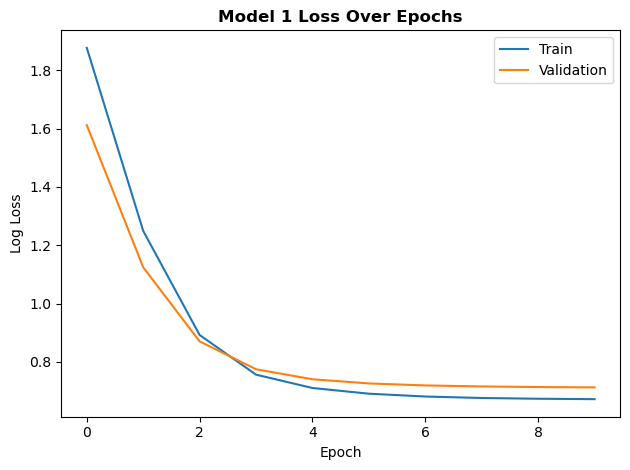

In [13]:
plt.plot(History_M1.history['loss'], label = 'Train')
plt.plot(History_M1.history['val_loss'], label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.title('Model 1 Loss Over Epochs', fontweight = 'bold')
plt.legend()
plt.tight_layout()
plt.show()

### Hyperparameter Tuning

Model 1 Tuned Train Loss: 0.6693 | Model 1 Tuned Train Accuracy: 0.5839
Model 1 Tuned Validation Loss: 0.7074 | Model 1 Tuned Validation Accuracy: 0.4785


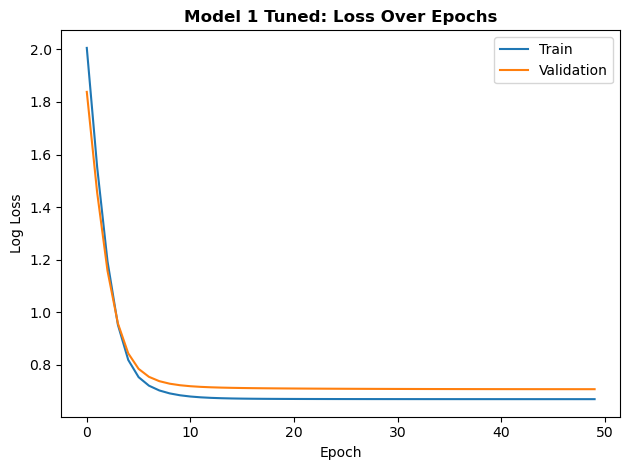

In [14]:
Model_1_Tuned = build_model_1(lr = 0.001)
History_M1_Tuned = Model_1_Tuned.fit(x = X_Train_M1, y = Y_Train_M1, validation_data = (X_Validation_M1, Y_Validation_M1), batch_size = 5, epochs = 50, verbose = 0)

#######################################################

Train_Predictions_M1_Tuned = Model_1_Tuned.predict(x = X_Train_M1, verbose = 0)
Train_Loss_M1_Tuned, Train_Accuracy_M1_Tuned = Model_1_Tuned.evaluate(x = X_Train_M1, y = Y_Train_M1, verbose = 0)
print(f'Model 1 Tuned Train Loss: {Train_Loss_M1_Tuned:.4f} | Model 1 Tuned Train Accuracy: {Train_Accuracy_M1_Tuned:.4f}')

Validation_Predictions_M1_Tuned = Model_1_Tuned.predict(x = X_Validation_M1, verbose = 0)
Validation_Loss_M1_Tuned, Validation_Accuracy_M1_Tuned = Model_1_Tuned.evaluate(x = X_Validation_M1, y = Y_Validation_M1, verbose = 0)
print(f'Model 1 Tuned Validation Loss: {Validation_Loss_M1_Tuned:.4f} | Model 1 Tuned Validation Accuracy: {Validation_Accuracy_M1_Tuned:.4f}')

#######################################################

plt.plot(History_M1_Tuned.history['loss'], label = 'Train')
plt.plot(History_M1_Tuned.history['val_loss'], label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.title('Model 1 Tuned: Loss Over Epochs', fontweight = 'bold')
plt.legend()
plt.tight_layout()
plt.show()


### Test Performance

In [15]:
Test_Predictions_M1_Tuned = Model_1_Tuned.predict(x = X_Test_M1, verbose = 0)
Test_Loss_M1_Tuned, Test_Accuracy_M1_Tuned = Model_1_Tuned.evaluate(x = X_Test_M1, y = Y_Test_M1, verbose = 0)
print(f'Model 1 Tuned Test Loss: {Test_Loss_M1_Tuned:.4f} | Model 1 Tuned Test Accuracy: {Test_Accuracy_M1_Tuned:.4f}')

Model 1 Tuned Test Loss: 0.7090 | Model 1 Tuned Test Accuracy: 0.4791


## **Model 2**: Height, Weight, Reach, Age + Stats

### Copying DataFrames

In [16]:
X_Train_M2 = X_Train.copy()
Y_Train_M2 = Y_Train.copy()

X_Validation_M2 = X_Validation.copy()
Y_Validation_M2 = Y_Validation.copy()

X_Test_M2 = X_Test.copy()
Y_Test_M2 = Y_Test.copy()

### Selecting Features and Outcome

In [17]:
X_Train_M2 = X_Train_M2[['A_Height', 'A_Weight', 'A_Reach', 'A_Age', 'A_SLPM', 'A_SACC', 'A_SAPM', 'A_SD', 'A_TDAVG', 'A_TDACC', 'A_TDD', 'A_SAVG', 'B_Height', 'B_Weight', 'B_Reach', 'B_Age', 'B_SLPM', 'B_SACC', 'B_SAPM', 'B_SD', 'B_TDAVG', 'B_TDACC', 'B_TDD', 'B_SAVG']]
X_Validation_M2 = X_Validation_M2[['A_Height', 'A_Weight', 'A_Reach', 'A_Age', 'A_SLPM', 'A_SACC', 'A_SAPM', 'A_SD', 'A_TDAVG', 'A_TDACC', 'A_TDD', 'A_SAVG', 'B_Height', 'B_Weight', 'B_Reach', 'B_Age', 'B_SLPM', 'B_SACC', 'B_SAPM', 'B_SD', 'B_TDAVG', 'B_TDACC', 'B_TDD', 'B_SAVG']]
X_Test_M2 = X_Test_M2[['A_Height', 'A_Weight', 'A_Reach', 'A_Age', 'A_SLPM', 'A_SACC', 'A_SAPM', 'A_SD', 'A_TDAVG', 'A_TDACC', 'A_TDD', 'A_SAVG', 'B_Height', 'B_Weight', 'B_Reach', 'B_Age', 'B_SLPM', 'B_SACC', 'B_SAPM', 'B_SD', 'B_TDAVG', 'B_TDACC', 'B_TDD', 'B_SAVG']]

### Dropping Missing Values

In [18]:
# TRAIN
print('TRAIN')
print(f'Before Drop: {X_Train_M2.shape}')
# Identify Missing Indices
X_Train_M2_Missing_Indices = X_Train_M2.index[X_Train_M2.isnull().any(axis = 1)]
# Drop Missing Indices
X_Train_M2 = X_Train_M2.drop(X_Train_M2_Missing_Indices)
Y_Train_M2 = Y_Train_M2.drop(X_Train_M2_Missing_Indices)
# Reset Index
X_Train_M2 = X_Train_M2.reset_index(drop = True)
Y_Train_M2 = Y_Train_M2.reset_index(drop = True)
print(f'After Drop: {X_Train_M2.shape}')
print('------------------------------------')

# VALIDATION
print('VALIDATION')
print(f'Before Drop: {X_Validation_M2.shape}')
# Identify Missing Indices
X_Validation_M2_Missing_Indices = X_Validation_M2.index[X_Validation_M2.isnull().any(axis = 1)]
# Drop Missing Indices
X_Validation_M2 = X_Validation_M2.drop(X_Validation_M2_Missing_Indices)
Y_Validation_M2 = Y_Validation_M2.drop(X_Validation_M2_Missing_Indices)
# Reset Index
X_Validation_M2 = X_Validation_M2.reset_index(drop = True)
Y_Validation_M2 = Y_Validation_M2.reset_index(drop = True)
print(f'After Drop: {X_Validation_M2.shape}')
print('------------------------------------')

# TEST
print('TEST')
print(f'Before Drop: {X_Test_M2.shape}')
# Identify Missing Indices
X_Test_M2_Missing_Indices = X_Test_M2.index[X_Test_M2.isnull().any(axis = 1)]
# Drop Missing Indices
X_Test_M2 = X_Test_M2.drop(X_Test_M2_Missing_Indices)
Y_Test_M2 = Y_Test_M2.drop(X_Test_M2_Missing_Indices)
# Reset Index
X_Test_M2 = X_Test_M2.reset_index(drop = True)
Y_Test_M2 = Y_Test_M2.reset_index(drop = True)
print(f'After Drop: {X_Test_M2.shape}')
print('------------------------------------')

TRAIN
Before Drop: (4687, 24)
After Drop: (4554, 24)
------------------------------------
VALIDATION
Before Drop: (1563, 24)
After Drop: (1509, 24)
------------------------------------
TEST
Before Drop: (1563, 24)
After Drop: (1528, 24)
------------------------------------


### Building Model

In [19]:
def build_model_2(lr):

    tf.random.set_seed(0) 
    tf.keras.backend.clear_session()

    model = tf.keras.models.Sequential()

    # Input Layer
    model.add(tf.keras.Input(shape = (24, ), name = 'Input')) # Input Dimension

    # Output Layer
    model.add(tf.keras.layers.Dense(
        units = 1, # Output Dimension
        use_bias = True, # Add Bias Parameter (Instead of Concatenating a Column of 1's)
        activation = 'sigmoid', # Activation Function
        kernel_initializer = tf.keras.initializers.Ones(), # Weight Initializer
        bias_initializer = tf.keras.initializers.Ones(), # Bias Initializer
        name = 'Output'
        ))
    
    # Compile Model
    model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = lr),
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])

    return model

### Fitting Model

In [20]:
Model_2 = build_model_2(lr = 0.01)
History_M2 = Model_2.fit(x = X_Train_M2, y = Y_Train_M2, validation_data = (X_Validation_M2, Y_Validation_M2), batch_size = 32, epochs = 10, verbose = 0)

### Performance

In [21]:
Train_Predictions_M2 = Model_2.predict(x = X_Train_M2, verbose = 0)
Train_Loss_M2, Train_Accuracy_M2 = Model_2.evaluate(x = X_Train_M2, y = Y_Train_M2, verbose = 0)
print(f'Model 2 Train Loss : {Train_Loss_M2:.4f} | Model 2 Train Accuracy : {Train_Accuracy_M2:.4f}')

Validation_Predictions_M2 = Model_2.predict(x = X_Validation_M2, verbose = 0)
Validation_Loss_M2, Validation_Accuracy_M2 = Model_2.evaluate(x = X_Validation_M2, y = Y_Validation_M2, verbose = 0)
print(f'Model 2 Validation Loss: {Validation_Loss_M2:.4f} | Model 2 Validation Accuracy : {Validation_Accuracy_M2:.4f}')

Model 2 Train Loss : 0.6632 | Model 2 Train Accuracy : 0.6421
Model 2 Validation Loss: 0.6711 | Model 2 Validation Accuracy : 0.6262


### Plotting Performance

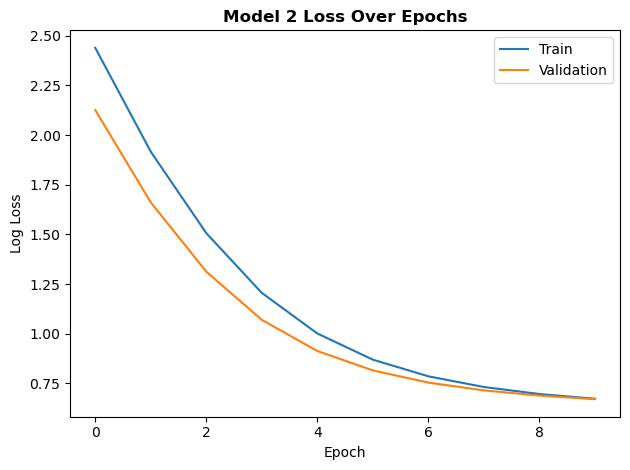

In [22]:
plt.plot(History_M2.history['loss'], label = 'Train')
plt.plot(History_M2.history['val_loss'], label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.title('Model 2 Loss Over Epochs', fontweight = 'bold')
plt.legend()
plt.tight_layout()
plt.show()

### Hyperparameter Tuning

Model 2 Tuned Train Loss: 0.6053 | Model 2 Tuned Train Accuracy: 0.6664
Model 2 Tuned Validation Loss: 0.6167 | Model 2 Tuned Validation Accuracy: 0.6594


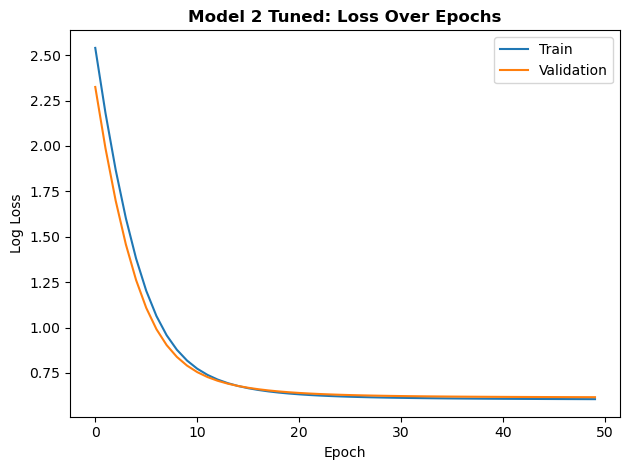

In [23]:
Model_2_Tuned = build_model_2(lr = 0.001)
History_M2_Tuned = Model_2_Tuned.fit(x = X_Train_M2, y = Y_Train_M2, validation_data = (X_Validation_M2, Y_Validation_M2), batch_size = 5, epochs = 50, verbose = 0)

#######################################################

Train_Predictions_M2_Tuned = Model_2_Tuned.predict(x = X_Train_M2, verbose = 0)
Train_Loss_M2_Tuned, Train_Accuracy_M2_Tuned = Model_2_Tuned.evaluate(x = X_Train_M2, y = Y_Train_M2, verbose = 0)
print(f'Model 2 Tuned Train Loss: {Train_Loss_M2_Tuned:.4f} | Model 2 Tuned Train Accuracy: {Train_Accuracy_M2_Tuned:.4f}')

Validation_Predictions_M2_Tuned = Model_2_Tuned.predict(x = X_Validation_M2, verbose = 0)
Validation_Loss_M2_Tuned, Validation_Accuracy_M2_Tuned = Model_2_Tuned.evaluate(x = X_Validation_M2, y = Y_Validation_M2, verbose = 0)
print(f'Model 2 Tuned Validation Loss: {Validation_Loss_M2_Tuned:.4f} | Model 2 Tuned Validation Accuracy: {Validation_Accuracy_M2_Tuned:.4f}')

#######################################################

plt.plot(History_M2_Tuned.history['loss'], label = 'Train')
plt.plot(History_M2_Tuned.history['val_loss'], label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.title('Model 2 Tuned: Loss Over Epochs', fontweight = 'bold')
plt.legend()
plt.tight_layout()
plt.show()

### Test Performance

In [24]:
Test_Predictions_M2_Tuned = Model_2_Tuned.predict(x = X_Test_M2, verbose = 0)
Test_Loss_M2_Tuned, Test_Accuracy_M2_Tuned = Model_2_Tuned.evaluate(x = X_Test_M2, y = Y_Test_M2, verbose = 0)
print(f'Model 2 Tuned Test Loss: {Test_Loss_M2_Tuned:.4f} | Model 2 Tuned Test Accuracy: {Test_Accuracy_M2_Tuned:.4f}')

Model 2 Tuned Test Loss: 0.6186 | Model 2 Tuned Test Accuracy: 0.6577


## **Model 3**: Age, Height, Weight, Reach + Stats + Names

### Copying DataFrames

In [25]:
X_Train_M3 = X_Train.copy()
Y_Train_M3 = Y_Train.copy()

X_Validation_M3 = X_Validation.copy()
Y_Validation_M3 = Y_Validation.copy()

X_Test_M3 = X_Test.copy()
Y_Test_M3 = Y_Test.copy()

### Selecting Features and Outcomes

In [26]:
X_Train_M3 = X_Train_M3[['A', 'A_Height', 'A_Weight', 'A_Reach', 'A_Age', 'A_SLPM', 'A_SACC', 'A_SAPM', 'A_SD', 'A_TDAVG', 'A_TDACC', 'A_TDD', 'A_SAVG', 'B', 'B_Height', 'B_Weight', 'B_Reach', 'B_Age', 'B_SLPM', 'B_SACC', 'B_SAPM', 'B_SD', 'B_TDAVG', 'B_TDACC', 'B_TDD', 'B_SAVG']]
X_Validation_M3 = X_Validation_M3[['A', 'A_Height', 'A_Weight', 'A_Reach', 'A_Age', 'A_SLPM', 'A_SACC', 'A_SAPM', 'A_SD', 'A_TDAVG', 'A_TDACC', 'A_TDD', 'A_SAVG', 'B', 'B_Height', 'B_Weight', 'B_Reach', 'B_Age', 'B_SLPM', 'B_SACC', 'B_SAPM', 'B_SD', 'B_TDAVG', 'B_TDACC', 'B_TDD', 'B_SAVG']]
X_Test_M3 = X_Test_M3[['A', 'A_Height', 'A_Weight', 'A_Reach', 'A_Age', 'A_SLPM', 'A_SACC', 'A_SAPM', 'A_SD', 'A_TDAVG', 'A_TDACC', 'A_TDD', 'A_SAVG', 'B', 'B_Height', 'B_Weight', 'B_Reach', 'B_Age', 'B_SLPM', 'B_SACC', 'B_SAPM', 'B_SD', 'B_TDAVG', 'B_TDACC', 'B_TDD', 'B_SAVG']]

### One-Hot Encoding Names

In [27]:
encoder = OneHotEncoder(handle_unknown = 'ignore', sparse_output = False)
encoder.fit(X_Train_M3[['A', 'B']])
X_Train_M3 = encoder.transform(X_Train_M3[['A', 'B']])
X_Validation_M3 = encoder.transform(X_Validation_M3[['A', 'B']])
X_Test_M3 = encoder.transform(X_Test_M3[['A', 'B']])

X_Train_M3 = pd.DataFrame(X_Train_M3, columns = encoder.get_feature_names_out(['A', 'B']))
X_Validation_M3 = pd.DataFrame(X_Validation_M3, columns = encoder.get_feature_names_out(['A', 'B']))
X_Test_M3 = pd.DataFrame(X_Test_M3, columns = encoder.get_feature_names_out(['A', 'B']))

### Dropping Missing Values

In [28]:
# TRAIN
print('TRAIN:')
print(f'Before: {X_Train_M3.shape}')
# Identify Rows w/ Missing Values
X_Train_M3_Missing_Rows = X_Train_M3.index[X_Train_M3.isnull().any(axis = 1)]
# Drop Rows w/ Missing Values
X_Train_M3 = X_Train_M3.drop(X_Train_M3_Missing_Rows)
Y_Train_M3 = Y_Train_M3.drop(X_Train_M3_Missing_Rows)
# Reset Index
X_Train_M3 = X_Train_M3.reset_index(drop = True)
Y_Train_M3 = Y_Train_M3.reset_index(drop = True)
print(f'After: {X_Train_M3.shape}')
print('------------------------------------')

# VALIDATION
print('VALIDATION:')
print(f'Before: {X_Validation_M3.shape}')
# Identify Rows w/ Missing Values
X_Validation_M3_Missing_Rows = X_Validation_M3.index[X_Validation_M3.isnull().any(axis = 1)]
# Drop Rows w/ Missing Values
X_Validation_M3 = X_Validation_M3.drop(X_Validation_M3_Missing_Rows)
Y_Validation_M3 = Y_Validation_M3.drop(X_Validation_M3_Missing_Rows)
# Reset Index
X_Validation_M3 = X_Validation_M3.reset_index(drop = True)
Y_Validation_M3 = Y_Validation_M3.reset_index(drop = True)
print(f'After: {X_Validation_M3.shape}')
print('------------------------------------')

# TEST
print('TEST:')
print(f'Before: {X_Test_M3.shape}')
# Identify Rows w/ Missing Values
X_Test_M3_Missing_Rows = X_Test_M3.index[X_Test_M3.isnull().any(axis = 1)]
# Drop Rows w/ Missing Values
X_Test_M3 = X_Test_M3.drop(X_Test_M3_Missing_Rows)
Y_Test_M3 = Y_Test_M3.drop(X_Test_M3_Missing_Rows)
# Reset Index
X_Test_M3 = X_Test_M3.reset_index(drop = True)
Y_Test_M3 = Y_Test_M3.reset_index(drop = True)
print(f'After: {X_Test_M3.shape}')

TRAIN:
Before: (4687, 3579)
After: (4687, 3579)
------------------------------------
VALIDATION:
Before: (1563, 3579)
After: (1563, 3579)
------------------------------------
TEST:
Before: (1563, 3579)
After: (1563, 3579)


### Building Model

In [31]:
def build_model_3(lr):

    tf.random.set_seed(0) 
    tf.keras.backend.clear_session()

    model = tf.keras.models.Sequential()

    # Input Layer
    model.add(tf.keras.Input(shape = (3579, ), name = 'Input')) # Input Dimension

    # Output Layer
    model.add(tf.keras.layers.Dense(
        units = 1, # Output Dimension
        use_bias = True, # Add Bias Parameter
        activation = 'sigmoid', # Activation Function
        kernel_initializer = tf.keras.initializers.Ones(), # Weight Initializer
        bias_initializer = tf.keras.initializers.Ones(), # Bias Initializer
        name = 'Output'
        ))
    
    # Compile Model
    model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = lr),
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])

    return model

### Fitting Model

In [32]:
Model_3 = build_model_3(lr = 0.01)
History_M3 = Model_3.fit(x = X_Train_M3, y = Y_Train_M3, validation_data = (X_Validation_M3, Y_Validation_M3), batch_size = 32, epochs = 10, verbose = 0)

### Performance

In [33]:
Train_Predictions_M3 = Model_3.predict(x = X_Train_M3, verbose = 0)
Train_Loss_M3, Train_Accuracy_M3 = Model_3.evaluate(x = X_Train_M3, y = Y_Train_M3, verbose = 0)
print(f'Model 3 Train Loss : {Train_Loss_M3:.4f} | Model 3 Train Accuracy : {Train_Accuracy_M3:.4f}')

Validation_Predictions_M3 = Model_3.predict(x = X_Validation_M3, verbose = 0)
Validation_Loss_M3, Validation_Accuracy_M3 = Model_3.evaluate(x = X_Validation_M3, y = Y_Validation_M3, verbose = 0)
print(f'Model 3 Validation Loss: {Validation_Loss_M3:.4f} | Model 3 Validation Accuracy : {Validation_Accuracy_M3:.4f}')

Model 3 Train Loss : 0.6927 | Model 3 Train Accuracy : 0.4982
Model 3 Validation Loss: 0.7346 | Model 3 Validation Accuracy : 0.4958


### Plotting Performance

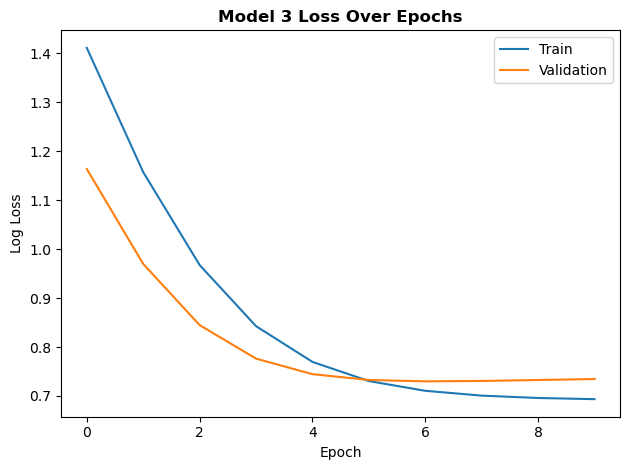

In [34]:
plt.plot(History_M3.history['loss'], label = 'Train')
plt.plot(History_M3.history['val_loss'], label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.title('Model 3 Loss Over Epochs', fontweight = 'bold')
plt.legend()
plt.tight_layout()
plt.show()

### Hyperparameter Tuning

Model 3 Tuned Train Loss: 0.6876 | Model 3 Tuned Train Accuracy: 0.7536
Model 3 Tuned Validation Loss: 0.7406 | Model 3 Tuned Validation Accuracy: 0.5259


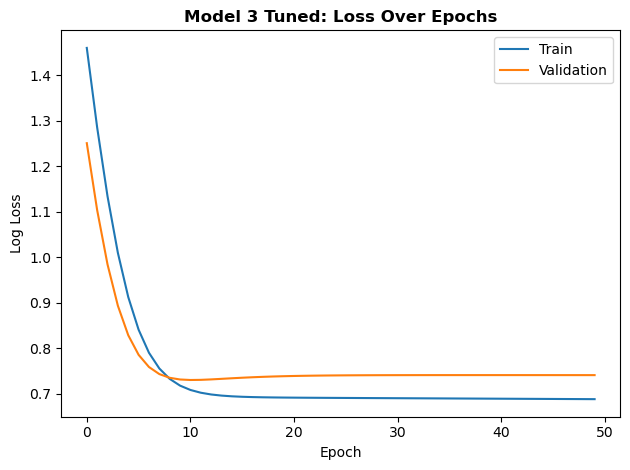

In [35]:
Model_3_Tuned = build_model_3(lr = 0.001)
History_M3_Tuned = Model_3_Tuned.fit(x = X_Train_M3, y = Y_Train_M3, validation_data = (X_Validation_M3, Y_Validation_M3), batch_size = 5, epochs = 50, verbose = 0)

#######################################################

Train_Predictions_M3_Tuned = Model_3_Tuned.predict(x = X_Train_M3, verbose = 0)
Train_Loss_M3_Tuned, Train_Accuracy_M3_Tuned = Model_3_Tuned.evaluate(x = X_Train_M3, y = Y_Train_M3, verbose = 0)
print(f'Model 3 Tuned Train Loss: {Train_Loss_M3_Tuned:.4f} | Model 3 Tuned Train Accuracy: {Train_Accuracy_M3_Tuned:.4f}')

Validation_Predictions_M3_Tuned = Model_3_Tuned.predict(x = X_Validation_M3, verbose = 0)
Validation_Loss_M3_Tuned, Validation_Accuracy_M3_Tuned = Model_3_Tuned.evaluate(x = X_Validation_M3, y = Y_Validation_M3, verbose = 0)
print(f'Model 3 Tuned Validation Loss: {Validation_Loss_M3_Tuned:.4f} | Model 3 Tuned Validation Accuracy: {Validation_Accuracy_M3_Tuned:.4f}')

#######################################################

plt.plot(History_M3_Tuned.history['loss'], label = 'Train')
plt.plot(History_M3_Tuned.history['val_loss'], label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.title('Model 3 Tuned: Loss Over Epochs', fontweight = 'bold')
plt.legend()
plt.tight_layout()
plt.show()

### Test Performance

In [36]:
Test_Predictions_M3_Tuned = Model_3_Tuned.predict(x = X_Test_M3, verbose = 0)
Test_Loss_M3_Tuned, Test_Accuracy_M3_Tuned = Model_3_Tuned.evaluate(x = X_Test_M3, y = Y_Test_M3, verbose = 0)
print(f'Model 3 Tuned Test Loss: {Test_Loss_M3_Tuned:.4f} | Model 3 Tuned Test Accuracy: {Test_Accuracy_M3_Tuned:.4f}')

Model 3 Tuned Test Loss: 0.7218 | Model 3 Tuned Test Accuracy: 0.5227
